### Dynamic Topic Modeling for PLOS topics
This notebook presents the analysis of pychology-related topics published in PLOS over time.


In [1]:
import pandas as pd
#%ls
data = pd.read_csv(r'C:\Users\karol\projects\plosAnalysis\plosOnePsychologyMetrics.csv')
# #data.head()

In [2]:
data.head()

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,citation_count
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03T00:00:00Z,2020-01-09T00:00:00Z,2020-07-06T00:00:00Z,2465,48,14.0
1,10.1371/journal.pone.0280457,"Need for affect, need for cognition, and the d...",['\nThe last decade has witnessed a significan...,PLOS ONE,2023-02-09T00:00:00Z,2021-10-08T00:00:00Z,2023-01-03T00:00:00Z,465,25,0.0
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15T00:00:00Z,2016-11-16T00:00:00Z,2018-02-01T00:00:00Z,2430,17,27.0
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12T00:00:00Z,2019-05-14T00:00:00Z,2019-10-11T00:00:00Z,2639,17,7.0
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29T00:00:00Z,2020-07-18T00:00:00Z,2021-01-05T00:00:00Z,2861,22,4.0


### Remove duplicates and image entries

In [3]:
data[data['title'].duplicated(keep=False)].sort_values('title').head(8)
#drop duplicates
data = data.drop_duplicates('title')
#drop irrelevant titles
data = data[~data['title'].str.contains('Issue Image | Vol.')]

### Remove stopwords

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words("english"))

def remove_stopwords(text) -> str:
   #Remove stopwords from text """
    filtered_words = [word for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)
data.loc[:, 'textClean'] = data['title'].apply(remove_stopwords)
data.head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,citation_count,textClean
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03T00:00:00Z,2020-01-09T00:00:00Z,2020-07-06T00:00:00Z,2465,48,14.0,link childhood psychological maltreatment cybe...
1,10.1371/journal.pone.0280457,"Need for affect, need for cognition, and the d...",['\nThe last decade has witnessed a significan...,PLOS ONE,2023-02-09T00:00:00Z,2021-10-08T00:00:00Z,2023-01-03T00:00:00Z,465,25,0.0,"Need affect, need cognition, desire independence"
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15T00:00:00Z,2016-11-16T00:00:00Z,2018-02-01T00:00:00Z,2430,17,27.0,dominance introspective measures implies: exam...
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12T00:00:00Z,2019-05-14T00:00:00Z,2019-10-11T00:00:00Z,2639,17,7.0,psychological profile influence position promi...
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29T00:00:00Z,2020-07-18T00:00:00Z,2021-01-05T00:00:00Z,2861,22,4.0,effect perceived interracial competition psych...


In [6]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Using BERTopic to cluster topics and visualise them over time

In [7]:
#bert topic is very slow so selecting only 10% of data first
# Determine the number of rows to select (10% of the total rows)
subset_size = int(len(data) * 0.1)

# Randomly select 10% of the rows
random_subset = data.sample(n=subset_size, random_state=42)  # Setting random_state for reproducibility

# Create a new DataFrame with the selected rows
subset10 = pd.DataFrame(random_subset)

In [8]:
#docs = data['textClean']
# If you are passing strings (dates) instead of integers, then BERTopic will try to automatically 
# detect which datetime format your strings have. Unfortunately, this will not always work if 
# they are in an unexpected format. We can use datetime_format to pass the format the timestamps have:
timestamps = subset10.publication_date.to_list()
titles = subset10.textClean.to_list()

# import random
# docs_list = list(docs)

# # Determine the size of the subset (10% of the data)
# subset_size = int(len(docs_list) * 0.1)

# # Randomly select 10% of the data
# random_subset = random.sample(docs_list, subset_size)



In [9]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(titles)

C:\Users\karol\myvenv\Lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\karol\myvenv\Lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
C:\Users\karol\myvenv\Lib\site-packages\umap\distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argume

In [10]:
# From these topics, we are going to generate the topic representations at each 
# timestamp for each topic. We do this by simply calling 
# topics_over_time and passing the titles, 
# the corresponding timestamps, and the related topics:
topics_over_time = topic_model.topics_over_time(titles, timestamps, nr_bins=20)

20it [00:00, 21.77it/s]


In [13]:
topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=10)

In [12]:
freq = topic_model.get_topic_info(); freq.head(5)
#try to 

,Topic,Count,Name,Representation,Representative_Docs
0,-1,547,-1_among_study_cognitive_effects,"[among, study, cognitive, effects, learning, s...",[High perceived stress social interaction beha...
1,0,92,0_foraging_ant_breeding_ants,"[foraging, ant, breeding, ants, female, fish, ...",[New Method Quantify within Dive Foraging Beha...
2,1,61,1_intergroup_prosocial_social_stock,"[intergroup, prosocial, social, stock, ingroup...",[Bullshit-sensitivity predicts prosocial behav...
3,2,54,2_covid19_pandemic_health_mental,"[covid19, pandemic, health, mental, distress, ...",[Impact COVID-19 pandemic mental physical heal...
4,3,45,3_stress_coping_psychological_depression,"[stress, coping, psychological, depression, ol...","[Psychological, social cognitive resources men..."


In [14]:
# Print the number of topics identified
topic_freq = topic_model.get_topic_freq()
num_topics = len(topic_freq)
print("Number of topics identified:", num_topics)

Number of topics identified: 30


In [15]:
#I need to clean the data a bit better, investigate the -1 and 0 topics
#freq.info()
# Filter rows where 'Topic' is equal to -1
filtered_df = freq[freq['Topic'] == -1]
pd.set_option('display.max_colwidth', None)
print(filtered_df['Representative_Docs'])

0    [High perceived stress social interaction behaviour among young adults. study based objective measures face-to-face smartphone interactions, Multilevel analysis personality, family, classroom influences emotional behavioral problems among Chinese adolescent students, association disordered eating health-related quality life among children adolescents: systematic review population-based studies]
Name: Representative_Docs, dtype: object


In [16]:
#remove stopwords
topic_model.get_topic(0)

[('foraging', 0.038090747272365034),
 ('ant', 0.024946477913323443),
 ('breeding', 0.024946477913323443),
 ('ants', 0.024946477913323443),
 ('female', 0.024773819701951017),
 ('fish', 0.023947077794196442),
 ('birds', 0.023947077794196442),
 ('social', 0.02148861890259227),
 ('conservation', 0.020937910026609007),
 ('behaviour', 0.020317391468783842)]

In [17]:
topic_model.visualize_hierarchy(top_n_topics=20)

In [18]:
#topic_model.visualize_topics(top_n_topics=10)
topic_model.visualize_barchart(top_n_topics=10)

In [64]:
#topic_model.reduce_topics(docs, nr_topics=10)
#https://www.vennify.ai/bertopic-topic-modeling/
#predict new topic
infor_doc=topic_model.get_document_info(titles)
infor_doc.head()

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,Behavioural mimicry indicator affiliation,-1,-1_among_study_cognitive_effects,"[among, study, cognitive, effects, learning, social, emotional, associated, analysis, time]",[High perceived stress social interaction behaviour among young adults. study based objective me...,among - study - cognitive - effects - learning - social - emotional - associated - analysis - time,0.522137,False
1,Categorical colour geometry,-1,-1_among_study_cognitive_effects,"[among, study, cognitive, effects, learning, social, emotional, associated, analysis, time]",[High perceived stress social interaction behaviour among young adults. study based objective me...,among - study - cognitive - effects - learning - social - emotional - associated - analysis - time,0.440869,False
2,Body Space Social Interactions: Comparison Reaching Comfort Distance Immersive Virtual Reality,-1,-1_among_study_cognitive_effects,"[among, study, cognitive, effects, learning, social, emotional, associated, analysis, time]",[High perceived stress social interaction behaviour among young adults. study based objective me...,among - study - cognitive - effects - learning - social - emotional - associated - analysis - time,0.509966,False
3,"Madrid Affective Database Spanish (MADS): Ratings Dominance, Familiarity, Subjective Age Acquisi...",9,9_language_lexical_chinese_children,"[language, lexical, chinese, children, translation, english, linguistic, word, spanish, translat...","[Language structure, attitudes, learning ambient exposure: Lexical phonotactic knowledge Spanish...",language - lexical - chinese - children - translation - english - linguistic - word - spanish - ...,0.040843,False
4,Spanish version reflective functioning questionnaire: Validity data general population individua...,19,19_personality_questionnaire_version_validity,"[personality, questionnaire, version, validity, traits, validation, development, data, reflectiv...",[Internal external validity brief version Multidimensional Personality Questionnaire: Explorator...,personality - questionnaire - version - validity - traits - validation - development - data - re...,1.000000,True


In [20]:
#https://maartengr.github.io/BERTopic/faq.html#why-does-it-take-so-long-to-import-bertopic

In [21]:
topic_model.visualize_hierarchy(top_n_topics=10)

### Calculate popularity and citation score adjusted for time

In [36]:
data.dtypes

id                                         object
title                                      object
abstract                                   object
journal                                    object
publication_date              datetime64[ns, UTC]
received_date                 datetime64[ns, UTC]
accepted_date                 datetime64[ns, UTC]
counter_total_all                           int64
counter_total_month                         int64
citation_count                             object
textClean                                  object
days_published                              int64
views_per_day                             float64
received_to_accepted_days                 float64
accepted_to_published_days                float64
citations_int                             float64
dtype: object

In [38]:
#count views per day, from the download day
#date = 28/06/2023
#days_published = date - publication_date
#views_per_day =days_published/counter_total_all

#import pandas as pd
from datetime import datetime
import pytz

# Sample data
#data = {'publication_date': ['2020-09-03T00:00:00Z', '2022-03-15T00:00:00Z', '2021-11-28T00:00:00Z']}
#df = pd.DataFrame(data)

# Convert publication_date column to datetime type
data['publication_date'] = pd.to_datetime(data['publication_date'])

# Convert given_date to datetime type and localize to UTC timezone
given_date = datetime.strptime('28/06/2023', '%d/%m/%Y').replace(tzinfo=pytz.UTC)

# Calculate the difference in days
data['days_published'] = (given_date - data['publication_date']).dt.days

# We have an issue here in that if we divide days published by 0 we will get infinity.
# We should dump rows with 0 views

data = data[data['counter_total_all'] != 0]

data['views_per_day'] = data['counter_total_all']/data['days_published']

################################################
#do the same for citations
################################################

#clean citation column
#check it only contains numbers>0
#force convert to int, there may be some error values so they will be converted to nan
data['citations_int'] = pd.to_numeric(data['citation_count'], errors='coerce')
#not this is a float

#remove 0 and NaN
data = data[data['citations_int'] != 0]
data=data.dropna(subset=['citations_int'])

data['citations_per_day'] = (data['citations_int']/data['days_published'])
# Display the resulting dataframe
pd.set_option('display.max_colwidth', 50)
data.head()

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,citation_count,textClean,days_published,views_per_day,received_to_accepted_days,accepted_to_published_days,citations_int,citations_per_day
0,10.1371/journal.pone.0236792,The link between childhood psychological maltr...,"['\nBased on Attachment Theory, the Barlett an...",PLOS ONE,2020-09-03 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-07-06 00:00:00+00:00,2465,48,14.0,link childhood psychological maltreatment cybe...,1028,2.397860,179.0,59.0,14.0,0.013619
2,10.1371/journal.pone.0192907,The dominance of introspective measures and wh...,"['\nThe behavioral sciences, including most of...",PLOS ONE,2018-02-15 00:00:00+00:00,2016-11-16 00:00:00+00:00,2018-02-01 00:00:00+00:00,2430,17,27.0,dominance introspective measures implies: exam...,1959,1.240429,442.0,14.0,27.0,0.013783
3,10.1371/journal.pone.0224326,Does the psychological profile influence the p...,['\nStress control as well as other psychologi...,PLOS ONE,2019-11-12 00:00:00+00:00,2019-05-14 00:00:00+00:00,2019-10-11 00:00:00+00:00,2639,17,7.0,psychological profile influence position promi...,1324,1.993202,150.0,32.0,7.0,0.005287
4,10.1371/journal.pone.0245671,The effect of perceived interracial competitio...,['\nThere remains a dearth of research on caus...,PLOS ONE,2021-01-29 00:00:00+00:00,2020-07-18 00:00:00+00:00,2021-01-05 00:00:00+00:00,2861,22,4.0,effect perceived interracial competition psych...,880,3.251136,171.0,24.0,4.0,0.004545
5,10.1371/journal.pone.0147275,Positive Affect and Cognitive Restoration: Inv...,['\nPositive moods are thought to restore self...,PLOS ONE,2016-01-19 00:00:00+00:00,2015-09-15 00:00:00+00:00,2016-01-02 00:00:00+00:00,3771,5,8.0,Positive Affect Cognitive Restoration: Investi...,2717,1.387928,109.0,17.0,8.0,0.002944


### Top cited and viewed papers


In [40]:
import numpy as np
# Calculate the minimum and maximum values
y = data['views_per_day'].values
min_value_views = np.min(y)
max_value_views = np.max(y)

z = data['citations_per_day'].values
min_value_cit = np.min(z)
max_value_cit = np.max(z)

print("Minimum value of views:", min_value_views)
print("Maximum value of views:", max_value_views)
print("Minimum value of citations:", min_value_cit)
print("Maximum value of citations:", max_value_cit)

Minimum value of views: 0.30027173913043476
Maximum value of views: 3323.9326947315353
Minimum value of citations: 0.00014255167498218105
Maximum value of citations: 1.920863309352518


In [41]:
#Let's look at the most viewed papers
top_10_papers = data.nlargest(20, 'views_per_day')

# Print the rows of the top 10 papers
pd.set_option('display.max_colwidth', None)
print(top_10_papers['title'], top_10_papers['views_per_day'], top_10_papers['publication_date'])

9856                                                                                                         Glass Shape Influences Consumption Rate for Alcoholic Beverages
1110                                                                                                        Diurnal variations of psychometric indicators in Twitter content
364                                                                                 Loneliness predicts a preference for larger interpersonal distance within intimate space
7797                                                                                Battle for the thermostat: Gender and the effect of temperature on cognitive performance
10071                                                                                             Altered smell and taste: Anosmia, parosmia and the impact of long Covid-19
9795                                                                Performance of ChatGPT on USMLE: Potential for AI-assisted medical 

In [44]:
#Let's look at the most cited papers
top_10_cited = data.nlargest(20, 'citations_per_day')

# Print the rows of the top 10 papers
pd.set_option('display.max_colwidth', 100)
print(top_10_cited['title'], top_10_cited['citations_per_day'], top_10_cited['publication_date'])

9795     Performance of ChatGPT on USMLE: Potential for AI-assisted medical education using large languag...
3068     Students under lockdown: Comparisons of students’ social networks and mental health before and d...
3945     Psychological impacts from COVID-19 among university students: Risk factors across seven states ...
1774     The Ryerson Audio-Visual Database of Emotional Speech and Song (RAVDESS): A dynamic, multimodal ...
5119     Emotional responses and coping strategies in nurses and nursing students during Covid-19 outbrea...
8011                                    Impact of COVID-19 pandemic on mental health: An international study
12408    Factors contributing to healthcare professional burnout during the COVID-19 pandemic: A rapid tu...
8453     The impact of COVID-19 pandemic on physical and mental health of Asians: A study of seven middle...
3976                                 Acute mental health responses during the COVID-19 pandemic in Australia
3939               

In [45]:
#calculate received_to_accepted_days
data['accepted_date'] = pd.to_datetime(data['accepted_date'])
data['received_date'] = pd.to_datetime(data['received_date'])
data['received_to_accepted_days'] = (data['accepted_date'] - data['received_date']).dt.days
#accepted to published days
data['accepted_to_published_days'] = (data['publication_date'] - data['accepted_date']).dt.days


data.head()


,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,citation_count,textClean,days_published,views_per_day,received_to_accepted_days,accepted_to_published_days,citations_int,citations_per_day
0,10.1371/journal.pone.0236792,The link between childhood psychological maltreatment and cyberbullying perpetration attitudes a...,"['\nBased on Attachment Theory, the Barlett and Gentile Cyberbullying Model and General Aggressi...",PLOS ONE,2020-09-03 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-07-06 00:00:00+00:00,2465,48,14.0,link childhood psychological maltreatment cyberbullying perpetration attitudes among undergradua...,1028,2.397860,179.0,59.0,14.0,0.013619
2,10.1371/journal.pone.0192907,The dominance of introspective measures and what this implies: The example of environmental atti...,"['\nThe behavioral sciences, including most of psychology, seek to explain and predict behavior ...",PLOS ONE,2018-02-15 00:00:00+00:00,2016-11-16 00:00:00+00:00,2018-02-01 00:00:00+00:00,2430,17,27.0,dominance introspective measures implies: example environmental attitude,1959,1.240429,442.0,14.0,27.0,0.013783
3,10.1371/journal.pone.0224326,Does the psychological profile influence the position of promising young futsal players?,['\nStress control as well as other psychological characteristics influence sports performance (...,PLOS ONE,2019-11-12 00:00:00+00:00,2019-05-14 00:00:00+00:00,2019-10-11 00:00:00+00:00,2639,17,7.0,psychological profile influence position promising young futsal players?,1324,1.993202,150.0,32.0,7.0,0.005287
4,10.1371/journal.pone.0245671,The effect of perceived interracial competition on psychological outcomes,['\nThere remains a dearth of research on causal roles of perceived interracial competition on p...,PLOS ONE,2021-01-29 00:00:00+00:00,2020-07-18 00:00:00+00:00,2021-01-05 00:00:00+00:00,2861,22,4.0,effect perceived interracial competition psychological outcomes,880,3.251136,171.0,24.0,4.0,0.004545
5,10.1371/journal.pone.0147275,Positive Affect and Cognitive Restoration: Investigating the Role of Valence and Arousal,"['\nPositive moods are thought to restore self-control resources following depletion. However, i...",PLOS ONE,2016-01-19 00:00:00+00:00,2015-09-15 00:00:00+00:00,2016-01-02 00:00:00+00:00,3771,5,8.0,Positive Affect Cognitive Restoration: Investigating Role Valence Arousal,2717,1.387928,109.0,17.0,8.0,0.002944


<Axes: >

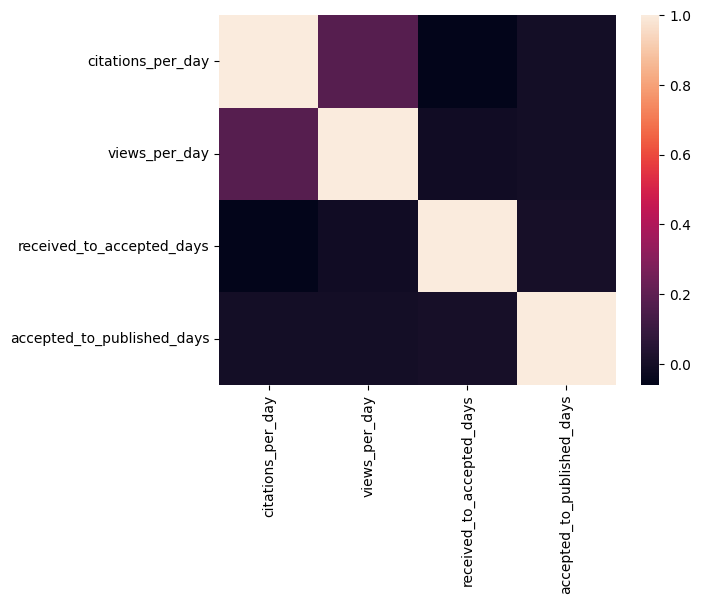

In [61]:
#!pip install seaborn
#Is there any correlation between views and citations

import seaborn as sns
import matplotlib.pyplot as plt
d = data[['citations_per_day','views_per_day','received_to_accepted_days','accepted_to_published_days']]
sns.heatmap(d.corr())

#very weak correlation of views per day and citations per day


In [86]:
#get rid of everything related to covid #
#search for covid and lockdown in titles
#rerun analysis
'''
mini example

foo = pd.DataFrame({'a' : [1,2,3,4], 'b' : ['hi', 'foo', 'fat', 'cat']})

import re
print(foo.b.str.contains('FO|FA',flags=re.IGNORECASE, regex=True))
#print(foo.loc[foo.b.str.contains('^f'), :])

'''





import re
data_cov = data.loc[data.title.str.contains('covid|lockdown',flags=re.IGNORECASE, regex=True), :]
data_nocov = data.loc[~data.title.str.contains('covid|lockdown',flags=re.IGNORECASE, regex=True), :]
 #                 '(foo|bar)'
#df.loc[df['column_name'] == some_value]
#df['conference'].str.contains('').any()

#if re.search('covid', 'Mandy Pande', re.IGNORECASE):

In [87]:
data_nocov.head()

,id,title,abstract,journal,publication_date,received_date,accepted_date,counter_total_all,counter_total_month,citation_count,textClean,days_published,views_per_day,received_to_accepted_days,accepted_to_published_days,citations_int,citations_per_day
0,10.1371/journal.pone.0236792,The link between childhood psychological maltreatment and cyberbullying perpetration attitudes a...,"['\nBased on Attachment Theory, the Barlett and Gentile Cyberbullying Model and General Aggressi...",PLOS ONE,2020-09-03 00:00:00+00:00,2020-01-09 00:00:00+00:00,2020-07-06 00:00:00+00:00,2465,48,14.0,link childhood psychological maltreatment cyberbullying perpetration attitudes among undergradua...,1028,2.397860,179.0,59.0,14.0,0.013619
2,10.1371/journal.pone.0192907,The dominance of introspective measures and what this implies: The example of environmental atti...,"['\nThe behavioral sciences, including most of psychology, seek to explain and predict behavior ...",PLOS ONE,2018-02-15 00:00:00+00:00,2016-11-16 00:00:00+00:00,2018-02-01 00:00:00+00:00,2430,17,27.0,dominance introspective measures implies: example environmental attitude,1959,1.240429,442.0,14.0,27.0,0.013783
3,10.1371/journal.pone.0224326,Does the psychological profile influence the position of promising young futsal players?,['\nStress control as well as other psychological characteristics influence sports performance (...,PLOS ONE,2019-11-12 00:00:00+00:00,2019-05-14 00:00:00+00:00,2019-10-11 00:00:00+00:00,2639,17,7.0,psychological profile influence position promising young futsal players?,1324,1.993202,150.0,32.0,7.0,0.005287
4,10.1371/journal.pone.0245671,The effect of perceived interracial competition on psychological outcomes,['\nThere remains a dearth of research on causal roles of perceived interracial competition on p...,PLOS ONE,2021-01-29 00:00:00+00:00,2020-07-18 00:00:00+00:00,2021-01-05 00:00:00+00:00,2861,22,4.0,effect perceived interracial competition psychological outcomes,880,3.251136,171.0,24.0,4.0,0.004545
5,10.1371/journal.pone.0147275,Positive Affect and Cognitive Restoration: Investigating the Role of Valence and Arousal,"['\nPositive moods are thought to restore self-control resources following depletion. However, i...",PLOS ONE,2016-01-19 00:00:00+00:00,2015-09-15 00:00:00+00:00,2016-01-02 00:00:00+00:00,3771,5,8.0,Positive Affect Cognitive Restoration: Investigating Role Valence Arousal,2717,1.387928,109.0,17.0,8.0,0.002944


In [89]:
#bert topic is very slow so selecting only 10% of data first
# Determine the number of rows to select (10% of the total rows)
subset_size = int(len(data_nocov) * 0.2)

# Randomly select 10% of the rows
random_subset_no_cov = data_nocov.sample(n=subset_size, random_state=42)  # Setting random_state for reproducibility

# Create a new DataFrame with the selected rows
subset20 = pd.DataFrame(random_subset_no_cov)

In [91]:
titles_no_cov = subset20.textClean.to_list()
#from bertopic import BERTopic

topic_model_no_cov = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics_nc, probs_nc = topic_model_no_cov.fit_transform(titles_no_cov)

Batches: 100%|██████████████████████████████████████████████████████████████████████████████████████| 77/77 [00:37<00:00,  2.04it/s]
2023-09-13 14:33:42,516 - BERTopic - Transformed documents to Embeddings
2023-09-13 14:34:15,684 - BERTopic - Reduced dimensionality
2023-09-13 14:34:16,386 - BERTopic - Clustered reduced embeddings


In [92]:
timestamps20 = subset20.publication_date.to_list()

topics_over_time_nc = topic_model_no_cov.topics_over_time(titles_no_cov, timestamps20, nr_bins=20)
topic_model_no_cov.visualize_topics_over_time(topics_over_time_nc, top_n_topics=10)

20it [00:01, 15.72it/s]


<Axes: >

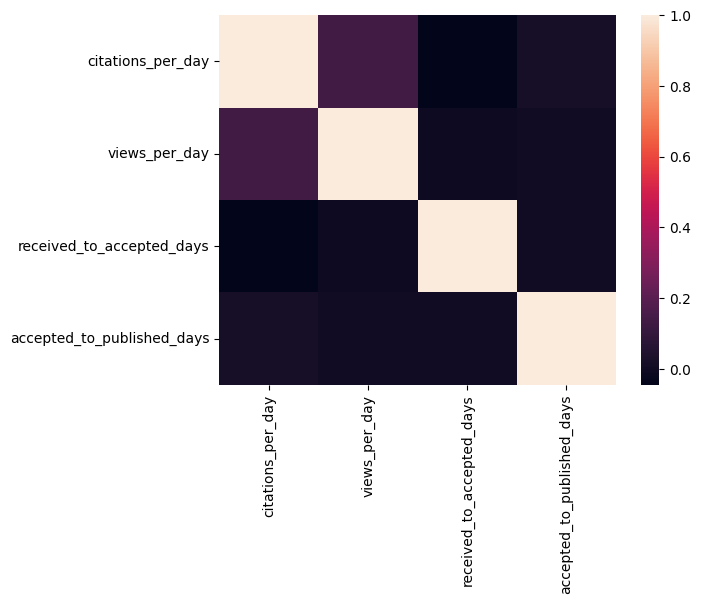

In [93]:
dnc = data_nocov[['citations_per_day','views_per_day','received_to_accepted_days','accepted_to_published_days']]
sns.heatmap(dnc.corr())